In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm

path = './results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0'

d = pd.read_pickle(os.path.join(path, 'log.pkl'))

In [2]:
path_fork = 'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_20_400/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=60,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/'
path_fork = 'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_30_800/alpha=10.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=60,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/'
d_fork = pd.read_pickle(os.path.join(path_fork, 'log.pkl'))

In [3]:
accs = []
for i, r in d.iterrows():
    accs.append(r['train_accs'])

accs = np.array(accs)

In [4]:
accs_fork = []
for i, r in d_fork.iterrows():
    accs_fork.append(r['train_accs'])

accs_fork = np.array(accs_fork)

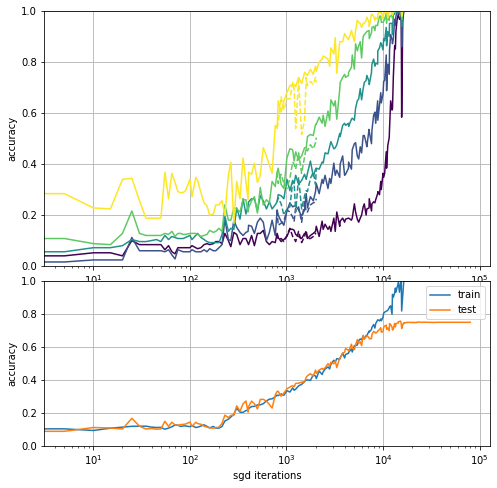

In [5]:
plt.figure(figsize=(8, 8))
plt.subplot2grid((5, 1), (0, 0), rowspan=3)
cmap = cm.viridis(np.linspace(0, 1, 5))
for i in range(5):
    plt.plot(d['iteration'], accs[:, i], color=cmap[i])
    plt.plot(d_fork['iteration'], accs_fork[:, i], '--', color=cmap[i])
plt.xscale('log')
plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.grid()

plt.subplot2grid((5, 1), (3, 0), rowspan=2)
plt.plot(d['iteration'], d['train_acc'], label='train')
plt.plot(d['iteration'], d['test_acc'], label='test')
plt.legend()
plt.xscale('log')
plt.xlabel('sgd iterations')
plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.grid()
plt.savefig('figures/acc_bins.pdf')
plt.show()

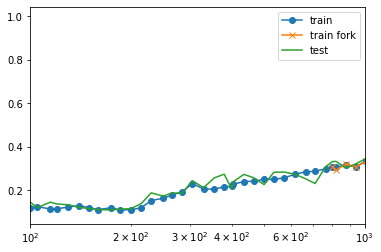

In [6]:
plt.plot(d['iteration'], d['train_acc'], label='train', marker='o')
plt.plot(d_fork['iteration'], d_fork['train_acc'], label='train fork', marker='x')
plt.plot(d['iteration'], d['test_acc'], label='test')
plt.legend()
plt.xscale('log')
plt.xlim(1e2, 1e3)
plt.show()